# 악성 사이트 탐지 (이진 분류 문제)

## 데이터 다운로드

In [4]:
pip install gdown

In [5]:
!gdown 1jV5yD_z_ZnRG-Snu-dXhmtdBP_70cZvI

Downloading...
From: https://drive.google.com/uc?id=1jV5yD_z_ZnRG-Snu-dXhmtdBP_70cZvI
To: C:\Users\imeun\aice\aice\TrainData.tsv

  0%|          | 0.00/751k [00:00<?, ?B/s]
 70%|######9   | 524k/751k [00:00<00:00, 1.93MB/s]
100%|##########| 751k/751k [00:00<00:00, 2.36MB/s]


### 1\. 라이브러리 임포트

- numpy, pandas, seaborn, matplotlib을 임포트 하시오.

In [155]:
# 여기 코드를 작성하시오.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



### 2\. 데이터 파일 읽기

- `TrainData.tsv` 파일을 pandas 라이브러리로 읽어 `df`에 대입하시오.
- 컬럼의 구분자가 `\t`임을 유의 하시오.
- 인덱스 컬럼이 tsv파일에 들어있는지 유의 하시오.
- df의 행 수를 Q2에 대입하시오.

In [124]:
# # 여기 코드를 작성하시오: \t를 구분자로 하는 파일을  읽기
df = pd.read_csv("TrainData.tsv",sep="\t")
df.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_tld,url_domain_len,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),Result_v1
0,1,15,0,4.0,0.0,0,3,3.000000,0,15.0,...,0,0,0,0,0,0,0,0,0,benign
1,2,96,0,3.0,82.0,68,6,4.000000,1,14.0,...,0,4,0,1,0,0,1,0,0,benign
2,3,12,0,3.0,0.0,0,5,3.333333,0,12.0,...,1,62,0,47,1,0,81,1,0,benign
3,4,35,0,3.0,18.0,10,7,5.000000,1,17.0,...,0,48,0,76,0,0,0,0,0,benign
4,5,38,0,3.0,17.0,16,12,6.333333,1,21.0,...,0,0,0,1,0,0,3,0,0,benign


In [125]:
df.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_tld,url_domain_len,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),Result_v1
0,1,15,0,4.0,0.0,0,3,3.000000,0,15.0,...,0,0,0,0,0,0,0,0,0,benign
1,2,96,0,3.0,82.0,68,6,4.000000,1,14.0,...,0,4,0,1,0,0,1,0,0,benign
2,3,12,0,3.0,0.0,0,5,3.333333,0,12.0,...,1,62,0,47,1,0,81,1,0,benign
3,4,35,0,3.0,18.0,10,7,5.000000,1,17.0,...,0,48,0,76,0,0,0,0,0,benign
4,5,38,0,3.0,17.0,16,12,6.333333,1,21.0,...,0,0,0,1,0,0,3,0,0,benign


In [126]:
len(df)

6108

In [127]:
Q2 =len(df)

### 3\. 변수 타입 파악

- `df`에 있는 변수들의 타입을 파악하고 `object`형 변수의 수를 Q3에 대입하시오.

In [128]:
df.dtypes

Unnamed: 0                     int64
url_len                        int64
url_num_hyphens_dom            int64
url_num_dom_token            float64
url_path_len                 float64
url_filename_len               int64
url_longest_dom_token_len      int64
url_average_dom_token_len    float64
url_tld                        int64
url_domain_len               float64
url_hostname_len               int64
url_num_dots                   int64
url_num_underscores          float64
url_num_equals               float64
url_num_slashes              float64
url_num_dash                   int64
url_num_semicolon              int64
url_num_at                     int64
url_num_percent                int64
url_num_plus                   int64
url_query_len                  int64
url_num_query_para             int64
url_ip_present                 int64
url_entropy                  float64
url_count_consonants           int64
url_num_digits                 int64
url_chinese_present            int64
u

In [129]:
# 여기 코드를 작성하시오.
df.select_dtypes(include="object")

,Result_v1
0,benign
1,benign
2,benign
3,benign
4,benign
...,...
6103,benign
6104,benign
6105,benign
6106,benign


In [130]:
Q3 = df.select_dtypes(include="object")

### 파일 설명

- `df`에 저장된 데이터셋은 웹사이트 URL과 HTML 정보 기반으로 악성 웹사이트 탐지를 위한 변수들로 구성되어 있다.

#### 주요 변수 설명

- url_len: URL의 전체 길이(문자 수).
- url_num_hyphens_dom: 도메인 내 하이픈(-)의 개수.
- url_num_dom_token: 도메인을 점(.)으로 나눈 토큰의 개수.
- url_path_len: URL 경로(Path) 부분의 길이.
- url_filename_len: URL 파일 이름의 길이.
- url_longest_dom_token_len: 도메인에서 가장 긴 토큰의 길이.
- url_average_dom_token_len: 도메인 토큰 길이의 평균값.
- url_tld: 최상위 도메인(TLD)의 코드 값.
- url_domain_len: 도메인 이름의 전체 길이.
- url_hostname_len: 호스트 이름의 길이.
- url_num_dots: URL 내 점(.)의 개수.
- url_num_underscores: URL 내 밑줄(_)의 개수.
- url_num_equals: URL 내 등호(=)의 개수.
- url_num_slashes: URL 내 슬래시(/)의 개수.
- url_num_dash: URL 내 대시(-)의 개수.
- url_num_semicolon: URL 내 세미콜론(;)의 개수.
- url_num_at: URL 내 @ 기호의 개수.
- url_num_percent: URL 내 퍼센트(%) 기호의 개수.
- url_num_plus: URL 내 플러스(+) 기호의 개수.
- url_query_len: URL 쿼리 문자열의 길이.
- url_num_query_para: URL 내 쿼리 파라미터의 개수.
- url_ip_present: URL에 IP 주소가 포함되어 있는지 여부 (0 또는 1).
- url_entropy: URL 문자열의 엔트로피 값(문자 분포 복잡성).
- url_count_consonants: URL 내 자음의 개수.
- url_num_digits: URL 내 숫자의 개수.
- url_chinese_present: URL에 중국어 문자가 포함되어 있는지 여부 (0 또는 1).
- url_port: URL 내 사용된 포트 번호.

#### HTML 태그 관련 변수

- html_num_tags('iframe'): HTML 소스 내 `<iframe>` 태그의 개수.
- html_num_tags('script'): HTML 소스 내 `<script>` 태그의 개수.
- html_num_tags('embed'): HTML 소스 내 `<embed>` 태그의 개수.
- html_num_tags('object'): HTML 소스 내 `<object>` 태그의 개수.
- html_num_tags('div'): HTML 소스 내 `<div>` 태그의 개수.
- html_num_tags('head'): HTML 소스 내 `<head>` 태그의 개수.
- html_num_tags('body'): HTML 소스 내 `<body>` 태그의 개수.
- html_num_tags('form'): HTML 소스 내 `<form>` 태그의 개수.
- html_num_tags('a'): HTML 소스 내 `<a>` 태그의 개수.
- html_num_tags('small'): HTML 소스 내 `<small>` 태그의 개수.
- html_num_tags('span'): HTML 소스 내 `<span>` 태그의 개수.
- html_num_tags('input'): HTML 소스 내 `<input>` 태그의 개수.
- html_num_tags('applet'): HTML 소스 내 `<applet>` 태그의 개수.
- html_num_tags('img'): HTML 소스 내 `<img>` 태그의 개수.
- html_num_tags('video'): HTML 소스 내 `<video>` 태그의 개수.
- html_num_tags('audio'): HTML 소스 내 `<audio>` 태그의 개수.

#### 결과 변수
- Result_v1: 악성 웹사이트 여부를 나타내는 레이블 (예: "Malicious" 또는 "Benign").

#### 목표
- Result_v1을 예측하는 모델 수립.


### 4\. 중복 제거

- 다음 지침에 따라 데이터에서 중복된 행을 제거 하시오.

- 대상 데이터프레임 `df`

- `duplicated()`를 사용하여 중복된 행 개수를 출력하시오.

- `drop_duplicated()`를 사용하여 중복된 행을 제거하고 결과를 `df`에 대입하시오.

- 결과 `df`의 행개수를 Q4 변수에 대입하시오.

In [131]:
# 여기 코드를 작성하시오: 중복된 행의 개수

df=df.drop_duplicates()
len(df)

6108

In [132]:
# 여기 코드를 작성하시오: 중복된 행을 제거후 df에 대입하시오.



In [133]:
Q4 =6108

In [134]:
df.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_tld,url_domain_len,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),Result_v1
0,1,15,0,4.0,0.0,0,3,3.000000,0,15.0,...,0,0,0,0,0,0,0,0,0,benign
1,2,96,0,3.0,82.0,68,6,4.000000,1,14.0,...,0,4,0,1,0,0,1,0,0,benign
2,3,12,0,3.0,0.0,0,5,3.333333,0,12.0,...,1,62,0,47,1,0,81,1,0,benign
3,4,35,0,3.0,18.0,10,7,5.000000,1,17.0,...,0,48,0,76,0,0,0,0,0,benign
4,5,38,0,3.0,17.0,16,12,6.333333,1,21.0,...,0,0,0,1,0,0,3,0,0,benign


### 5\. 타겟 변수 분포 확인

- 다음 지침에 따라 평균 URL 길이가 가장 긴 도메인 타입(TLD)을 찾으시오.

- 대상 데이터프레임 `df`

- 도메인 타입을 나타내는 `url_tld` 값에 따른 `Result_v1`의 분포를 `barplot`으로  그리시오.

- `barplot`을 보고 `url_tld` 값에 따른 `Result_v1`의 분포가 균일하면 Q4에 '균일'을 그렇지 않으면 '불균일'을 입력하시오.

<Axes: xlabel='url_tld', ylabel='Result_v1'>

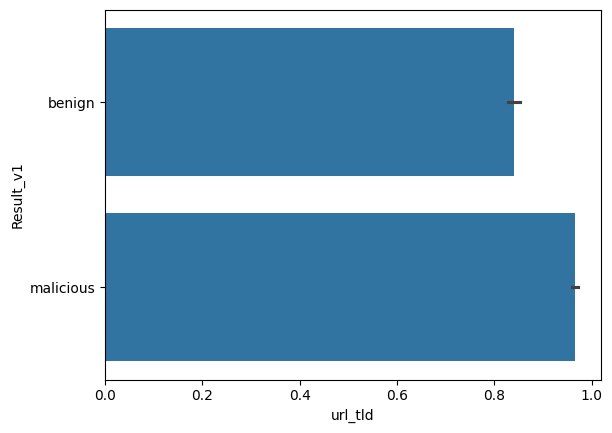

In [135]:
# 여기 코드르 작성하시오: url_tld==0, url_tld==1 인 경우 각각 Result_v1의 barplot을 그리시오.
df['url_len'].max()
sns.barplot(x="url_tld", y="Result_v1", data=df)

In [136]:
Q4 ='균일'

### 6\. 결측치 제거
- 아래 순서에 따라 결측치를 제거 하시오.
- 대상 데이터 프레임 `df`
- 컬럼별 결측치가 몇개나 있는지 확인하시오.
- 결측치가 있는 행을 모두 삭제한후 `df_na` 에 결과를 대입하시오.
- 결측치가 가장 많은 컬럼의 이름을 Q6에 대입하시오.

In [137]:
df.isnull().sum()

Unnamed: 0                   0
url_len                      0
url_num_hyphens_dom          0
url_num_dom_token            3
url_path_len                 1
url_filename_len             0
url_longest_dom_token_len    0
url_average_dom_token_len    0
url_tld                      0
url_domain_len               3
url_hostname_len             0
url_num_dots                 0
url_num_underscores          1
url_num_equals               1
url_num_slashes              1
url_num_dash                 0
url_num_semicolon            0
url_num_at                   0
url_num_percent              0
url_num_plus                 0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_count_consonants         0
url_num_digits               0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')      0
html_num_tags('embed')       0
html_num_tags('object')      0
html_num

In [138]:
# 여기 코드를 작성하시오: 변수별 빈값의 개수 확인
df.isnull().sum()
df_na = df.dropna(axis=0)


In [139]:
# 여기 코드를 작성하시오: 결측치 제거



In [140]:
Q6 = ['url_domain_len','url_num_dom_token']


In [141]:
df.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_tld,url_domain_len,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),Result_v1
0,1,15,0,4.0,0.0,0,3,3.000000,0,15.0,...,0,0,0,0,0,0,0,0,0,benign
1,2,96,0,3.0,82.0,68,6,4.000000,1,14.0,...,0,4,0,1,0,0,1,0,0,benign
2,3,12,0,3.0,0.0,0,5,3.333333,0,12.0,...,1,62,0,47,1,0,81,1,0,benign
3,4,35,0,3.0,18.0,10,7,5.000000,1,17.0,...,0,48,0,76,0,0,0,0,0,benign
4,5,38,0,3.0,17.0,16,12,6.333333,1,21.0,...,0,0,0,1,0,0,3,0,0,benign


### 7\. 불필요한 변수 삭제

- 대상 데이터 프레임: df_na
- `cols`에 들어있는 컬럼은 데이터 타입이 수치형으로 되어 있지만 0 또는 1의 값을 가지는 범주형 변수이다.(이미 정수 인코딩 되어 있는 상태)
- `cols` 컬럼의 유일값을 조사하고 `Result_v1`를 예측하는데 도움이 되지 않을 것이라 판단되는 컬럼 두개를 골라 데이터 프레임에서 삭제하시오.
- 결과를 새로운 데이터프레임 변수명 df_del에 저장하시오.

In [142]:
cols = ["url_tld", "url_ip_present",
        "url_port", "url_chinese_present", "html_num_tags('applet')"]
for col in cols:
    print(df_na[col].value_counts())

url_tld
1    5503
0     596
Name: count, dtype: int64
url_ip_present
0    5722
1     377
Name: count, dtype: int64
url_port
0    6090
1       9
Name: count, dtype: int64
url_chinese_present
0    6099
Name: count, dtype: int64
html_num_tags('applet')
0    6099
Name: count, dtype: int64


In [143]:
# 여기 코드를 작성하시오

df_del = df.drop(columns=['Unnamed: 0','url_num_hyphens_dom'],axis=1)

### 8\. 두 변수 시각화

- 대상 데이터 프레임: df_del
- 두 변수 `url_len`, `url_entropy` 를 이용해서 `scatterplot`을 그리되 `Result_v1`별로 색 구분해서 그리시오.
- 악성 사이트가 거의 없어지기 시작하는 `url_len`값을 다음 보기에서 골라 Q8에 보기 번호를 대입하시오.
    - 1) 100     
    - 2) 200
    - 3) 300
    - 4) 750


<Axes: xlabel='url_len', ylabel='url_entropy'>

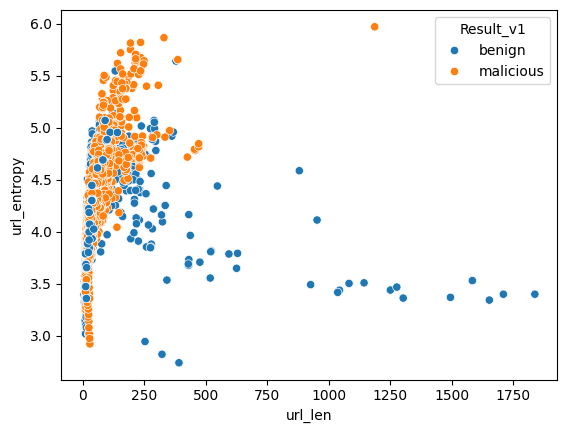

In [144]:
# 여기 코드를 작성하시오.
sns.scatterplot(x="url_len", y = "url_entropy",hue="Result_v1",data=df_del)


In [145]:
Q8 = 4

### 9\. 문자형 변수 인코딩

- 대상 데이터 프레임: `df_del`
- object 형 변수인 타겟 변수 `Result_v1`을 정수 인코딩 하시오.
- `benign`=0, `malicious`=1 처리
- pandas에서 제공하는 `map` 기능을 사용하시오.
- 인코딩된 결과를 수치형 컬럼과 함께 `df_ready`에 저장하시오.

In [146]:
# 여기 코드를 작성하시오: unique() 유일한 값 확인
df_del['Result_v1'].unique()

array(['benign', 'malicious'], dtype=object)

In [150]:
df_del.head(1000)

,url_len,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_tld,url_domain_len,url_hostname_len,url_num_dots,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),Result_v1
0,15,4.0,0.0,0,3,3.000000,0,15.0,15,3,...,0,0,0,0,0,0,0,0,0,benign
1,96,3.0,82.0,68,6,4.000000,1,14.0,14,3,...,0,4,0,1,0,0,1,0,0,benign
2,12,3.0,0.0,0,5,3.333333,0,12.0,12,2,...,1,62,0,47,1,0,81,1,0,benign
3,35,3.0,18.0,10,7,5.000000,1,17.0,17,3,...,0,48,0,76,0,0,0,0,0,benign
4,38,3.0,17.0,16,12,6.333333,1,21.0,21,3,...,0,0,0,1,0,0,3,0,0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,2.0,0.0,0,2,2.000000,1,5.0,5,1,...,0,30,0,12,0,0,2,0,0,benign
996,171,3.0,155.0,146,8,4.666667,1,16.0,16,3,...,0,2,0,0,0,0,1,0,0,benign
997,33,3.0,16.0,15,9,5.000000,1,17.0,17,4,...,0,79,0,26,0,0,41,0,0,benign
998,45,3.0,23.0,0,14,6.666667,1,22.0,22,2,...,2,122,0,52,7,0,137,0,0,benign


In [151]:
encoder = LabelEncoder()
encoder.fit(df_del['Result_v1'])
df_del['Result_v1'] = encoder.transform(df_del['Result_v1'])

In [152]:
# 여기 코드를 작성하시오: map를 사용하여 'benign'=0,'malicious'=1 처리
df_ready = df_del.copy()
df_ready.head(100)



,url_len,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_tld,url_domain_len,url_hostname_len,url_num_dots,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),Result_v1
0,15,4.0,0.0,0,3,3.000000,0,15.0,15,3,...,0,0,0,0,0,0,0,0,0,0
1,96,3.0,82.0,68,6,4.000000,1,14.0,14,3,...,0,4,0,1,0,0,1,0,0,0
2,12,3.0,0.0,0,5,3.333333,0,12.0,12,2,...,1,62,0,47,1,0,81,1,0,0
3,35,3.0,18.0,10,7,5.000000,1,17.0,17,3,...,0,48,0,76,0,0,0,0,0,0
4,38,3.0,17.0,16,12,6.333333,1,21.0,21,3,...,0,0,0,1,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18,3.0,0.0,0,10,5.333333,1,18.0,18,2,...,0,25,0,15,0,0,19,0,0,0
96,39,3.0,22.0,13,9,5.000000,1,17.0,17,3,...,2,29,0,8,3,0,0,0,0,0
97,192,2.0,185.0,46,4,3.000000,0,7.0,7,2,...,0,0,0,0,0,0,1,0,0,0
98,59,3.0,45.0,44,8,4.000000,1,14.0,14,3,...,0,0,0,0,0,0,0,0,0,0


### 10\. 학습, 검증 데이터 분할

- `sklearn`의 `train_test_split`을 사용하여 `df_ready`를 학습세트와 검증세트로 나누시오.
- 대상 데이터프레임: `df_ready`
- 타겟 변수: `Time_Driving`
- 학습세트 변수: `X_train`, `y_train`
- 검증세트 변수: `X_valid`, `y_valid`
- 분할 옵션: `test_size=0.3`, `random_state=2024`

In [153]:
df_ready = df_ready.reset_index(drop=True)

In [154]:
# 여기 코드를 작성하시오
# df_ready에서 X, y를 분리하시오.
from sklearn.model_selection import train_test_split

target = 'Result_v1'

y = df_ready[target]
X = df_ready.drop(target, axis=1)


X.shape, y.shape


((6108, 42), (6108,))

In [157]:
# 여기 코드를 작성하시오
# X, y를 X_train, X_valid, y_train, y_valid 로 나누시오.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2024)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.3,random_state=2024)


### 11\. 결정 트리, 랜덤포레스트 모델 학습을 준비된 데이터에 피팅 시키고 성능을 비교하시요.

- 학습 데이터: 스케일된 `X_train`, `y_train`
- 검증 데이터: 스케일된 `X_valid`, `y_valid`
- 각 모델은 `dt`, `rf` 변수에 대입하시오.
- 각 모델의 `X_valid`에 대한 예측 성능을 `confusion_matrix`, `classification_report`로 표시하시오.
- `macro f1`기준 더 우수한 모델을 Q11에 대입하시오. 랜덤포레스트의 경우 RF, 결정 트리 경우 DT

In [167]:
# 여기 코드를 작성하시오: 모델을 선언하고 fit()하기
# 1. 임포트
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 2.선언
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
# 3. fit()
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [168]:
# 여기 코드를 작성하시오: 모델의 성능 리포트
# 5. 성능 리포트를 위한 라이브러리 임포트


# 4. predict()
dt_predictions = dt.predict(X_valid)
rf_predictions = rf.predict(X_valid)
# 6. Confusion Matrix, classification_report 확인
dt_confusion_matrix = confusion_matrix(y_valid, dt_predictions)
rf_confusion_matrix = confusion_matrix(y_valid, rf_predictions)


In [169]:
dt_confusion_matrix

array([[609,  37],
       [ 28, 609]], dtype=int64)

In [170]:
rf_confusion_matrix

array([[621,  25],
       [ 20, 617]], dtype=int64)

In [175]:
classification_report(y_valid, dt_predictions)

'              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95       646\n           1       0.94      0.96      0.95       637\n\n    accuracy                           0.95      1283\n   macro avg       0.95      0.95      0.95      1283\nweighted avg       0.95      0.95      0.95      1283\n'

In [173]:
classification_report(y_valid, rf_predictions)

'              precision    recall  f1-score   support\n\n           0       0.97      0.96      0.97       646\n           1       0.96      0.97      0.96       637\n\n    accuracy                           0.96      1283\n   macro avg       0.96      0.96      0.96      1283\nweighted avg       0.96      0.96      0.96      1283\n'

In [ ]:
Q11 = rf

### 12\. 랜덤포레스트 그리드 서치

- 다음 조건으로 랜덤포레스트 모델을 그리드 서치 하시오.
- `{'n_estimators':[40,50,60,70], 'max_depth':[30,40,60,100]}`, `cv=3`, `scoring='accucary'`
- 랜덤 포레스트 모델은 `random_state=42`를 지정하시오.
- 그리드 서치후 베스트 모델에 대한 파리미터를 `{'max_depth': , 'n_estimators': }`형식으로 Q12에 대입하시오.

In [183]:
# 여기 코드를 작성하시오: 그리드 서치 모델을 fit()하시오.
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {'n_estimators':[40,50,60,70], 'max_depth':[30,40,60,100]}
rfc_grid = GridSearchCV(rf, param_grid = rf_param_grid, cv=3,scoring ='accuracy')
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [30, 40, 60, 100],
                         'n_estimators': [40, 50, 60, 70]},
             scoring='accuracy')

In [184]:
#  여기 코드를 작성하시오: 최적 결과에 대한 파라미터를 Q12에 저장하시오.
print('최적의 파라미터 값 : ', rfc_grid.best_params_)
Q12 = rfc_grid.best_params_

최적의 파라미터 값 :  {'max_depth': 30, 'n_estimators': 70}


### 13\. 딥러닝 모델링

- 입력 피처를 `StandradScaler()`로 스케일링하시오.
- 스케일된 입력을 `X_train_scaled`, `X_valid_scaled`에 대입하시오.
- 딥러닝 모델링은 다음 조건을 사용하시오.
    - 히든 레이어 2개 이상 사용, 활성함수 relu
    - Dropout 레이어 2개 이상 사용, 드롭아웃 비율 0.3
    - 손실함수: Binary Cross Entropy
    - 매트릭: Accuracy
    - 옵티마이저: adam, lr=0.01
    - 에폭: 30
    - 배치사이즈: 64
    - 각 에폭마다 `X_valid_scaled`, `y_valid`를 써서 검증을 수행하시오.
    - 학습 정보를 `history` 변수에 저장하시오.
    - early stop: valid 매트릭을 기준, `patience=3`로 적용
    - checkpoint: 파일은 `./model/checkpoint.weights.h5`, valid 매트릭을 모니터링 하면서 `save_weights_only=True`, `save_best_only=True`로 적용


In [185]:
# 여기 코드를 작성하시오: 입력 피처를 스케일링 스케일링하시오.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_valid_scaled = standard_scaler.fit_transform(X_valid)

In [191]:
X_train.shape

(2992, 42)

In [262]:
# 여기 코드를 작성하시오: 모델을 정의하고 컴파일 하시오.
import tensorflow as tf
from tensorflow import keras
################################################################################
# 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

################################################################################
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])


################################################################################
# 콜백 정의
# EarlyStopping
#  - val_accuracy 기준 patience 3

early_stopping = keras.callbacks.EarlyStopping(
    patience=3,
)

# ModelCheckpoint
#  - filepath: './model/checkpoint.weights.h5'
#  - val_accuracy기준 save_weights_only, save_best_only


################################################################################
checkpoint=tf.keras.callbacks.ModelCheckpoint(
   './model/checkpoint.weights.h5', monitor='val_loss', save_best_only=True,
    save_weights_only=True
)



In [263]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [264]:
# 여기 코드를 작성하시오: 임의의 입력에 대해서 포워드 테스트를 수행하시오.



In [265]:
# 여기 코드를 작성하시오: 학습을 수행하시오. 학습결과를 history 변수에 저장하시오.

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=30,
    callbacks=[early_stopping,checkpoint]
)


Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6199 - loss: 2.9868 - val_accuracy: 0.5035 - val_loss: 0.6937
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5227 - loss: 0.6928 - val_accuracy: 0.4965 - val_loss: 0.6933
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5166 - loss: 0.6930 - val_accuracy: 0.5035 - val_loss: 0.6931
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5064 - loss: 0.6932 - val_accuracy: 0.5035 - val_loss: 0.6933
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5205 - loss: 0.6923 - val_accuracy: 0.5035 - val_loss: 0.6931
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4875 - loss: 0.6935 - val_accuracy: 0.5035 - val_loss: 0.6931
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5035 - val_loss: 0.6931
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5056 - loss: 0.6930 - val_accuracy: 0.5035 - val_loss

### 14\. 성능 평가

- 학습 후 저장된 체크포인트를 모델에 로딩하고 검증 데이터 셋에 대해 성능을 평가하시오.
- history에 저장된 수치들을 시각화 하시오.
    - loss, mae의 그래프를 1행 2열인 figure에 각각 표시하시오.
    - 왼쪽 그래프에 `loss`, `val_loss`를 오른쪽 그래프이 `mae`, `val_mae`를 표시하시오.
    - 학습과 검증의 범례를 표시하고 X축 이름은 `epochs`,  Y축 이름은 각각 'loss', 'mae'로 표시하시오.

In [274]:
# 여기 코드를 작성하시오: 모델 체크포인트를 로딩하고 평가를 수행하시오.
from tensorflow.keras.models import load_model
model = model.load_weights('./model/checkpoint.weights.h5')
# 검증 데이터셋 평가


ValueError: A total of 3 objects could not be loaded. Example error message for object <Dense name=dense_81, built=False>:

Layer 'dense_81' was never built and thus it doesn't have any variables. However the weights file lists 2 variables for this layer.
In most cases, this error indicates that either:

1. The layer is owned by a parent layer that implements a `build()` method, but calling the parent's `build()` method did NOT create the state of the child layer 'dense_81'. A `build()` method must create ALL state for the layer, including the state of any children layers.

2. You need to implement the `def build_from_config(self, config)` method on layer 'dense_81', to specify how to rebuild it during loading. In this case, you might also want to implement the method that generates the build config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the layer (i.e. its variables) upon deserialization.

List of objects that could not be loaded:
[<Dense name=dense_81, built=False>, <Dense name=dense_82, built=False>, <Dense name=dense_83, built=False>]